### To Do
- [ ] more metrics to add: std, max/mean, (max - mean)/std, max/pop_mean, (max - pop_mean)/std
- [ ] iterate over scale parameter values for n=200, 2000, 20000
- [ ] How to compare probability massings for large-N simulation?
- [ ] Rejection sampling solution?
- [ ] Scale parameter (ratio) as metric?
- [ ] Relate scale parameter to prob massing error
- [ ] Is prob massing (alts shares) error affected by distribution of probs or just max prob?

#### Notes
- is MAPE the only valid metric here if true max prob is guaranteed to shrink as N increases?
    - use max utility instead of probs?
- probability distribution seems to get less spikey with more parameters
- Spikey-ness is a function of model error!

"draw is only as bad as your best alternative"

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [55]:
metrics_df = pd.read_csv('../data/iter_err_metrics.csv')
normed_metrics_df = metrics_df.copy()
num_metrics = 6
non_metric_cols = ['num_alts', 'num_choosers', 'sample_rate','run_id']
metric_cols = [col for col in metrics_df.columns if col not in non_metric_cols]
metrics = np.split(np.array(metric_cols), num_metrics)
metric_labels = [
    "True Max. Prob vs. True Samp. Max. Prob.",
    "True Max. Prob vs. Samp. Max. Corrected Prob.",
    "Expected Correction Factor vs. Sampled Correction Factor",
    "% Probs > $\mu_p$",
    "% Corrected Probs > $\mu_p$",
    "True Choice Shares vs. Samp. Choice Shares",
]
error_type_labels = ['Mean Error', 'MAPE', 'RMSE']
num_err_types = len(error_type_labels)

In [56]:
metrics_df.head(11)

,run_id,num_alts,num_choosers,sample_rate,tmsm_mean_err,tmsm_mean_abs_pct_err,tmsm_rmse,tmsmc_mean_err,tmsmc_mean_abs_pct_err,tmsmc_rmse,...,cf_rmse,ppgm_mean_err,ppgm_mean_abs_pct_err,ppgm_rmse,pcpgm_mean_err,pcpgm_mean_abs_pct_err,pcpgm_rmse,alt_shares_mean_err,alt_shares_mape,alt_shares_rmse
0,1,200,750,0.1,-0.149156,0.705965,0.165305,-1.587104e-01,7.506104e-01,1.649525e-01,...,7.795466e-02,0.379353,2.378383,0.401611,0.031287,0.426144,0.085614,-0.464,17.987984,0.690192
1,1,200,750,0.2,-0.121231,0.568154,0.142862,-1.276728e-01,5.974865e-01,1.370597e-01,...,1.039306e-01,0.250287,1.569074,0.268473,0.014453,0.295762,0.058357,-0.466,16.988652,0.691023
2,1,200,750,0.3,-0.099962,0.467803,0.125126,-1.045669e-01,4.890892e-01,1.160645e-01,...,1.210133e-01,0.171464,1.072638,0.186792,0.007909,0.225241,0.044284,-0.468,15.989319,0.691861
3,1,200,750,0.4,-0.078828,0.367117,0.108648,-8.394814e-02,3.941091e-01,9.839722e-02,...,1.366714e-01,0.116787,0.730312,0.130541,0.002687,0.175783,0.034734,-0.486,6.995327,0.699703
4,1,200,750,0.5,-0.064456,0.295893,0.097035,-6.693622e-02,3.223897e-01,8.523134e-02,...,1.400528e-01,0.077713,0.489798,0.089125,0.000593,0.138705,0.027587,-0.494,2.997997,0.703357
5,1,200,750,0.6,-0.049442,0.226485,0.083921,-5.267304e-02,2.604560e-01,7.357521e-02,...,1.356432e-01,0.048776,0.309452,0.058150,-0.000458,0.110664,0.021632,-0.496,1.998665,0.704287
6,1,200,750,0.7,-0.035109,0.161381,0.069496,-3.762915e-02,1.984553e-01,6.091322e-02,...,1.235339e-01,0.029306,0.190793,0.036266,-0.000704,0.086508,0.017140,-0.499,0.499666,0.705693
7,1,200,750,0.8,-0.022285,0.102911,0.054709,-2.515838e-02,1.454688e-01,4.797652e-02,...,1.075108e-01,0.016212,0.112786,0.021632,-0.001047,0.065291,0.012956,-0.500,1.000000,0.706165
8,1,200,750,0.9,-0.011102,0.048466,0.040365,-1.254650e-02,8.827118e-02,3.593703e-02,...,7.872309e-02,0.007339,0.060744,0.011975,-0.000624,0.044406,0.008984,-0.500,1.000000,0.706165
9,1,200,750,1.0,0.000000,0.000000,0.000000,8.145968e-10,3.564179e-08,1.471120e-08,...,7.759295e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500,1.000000,0.706165


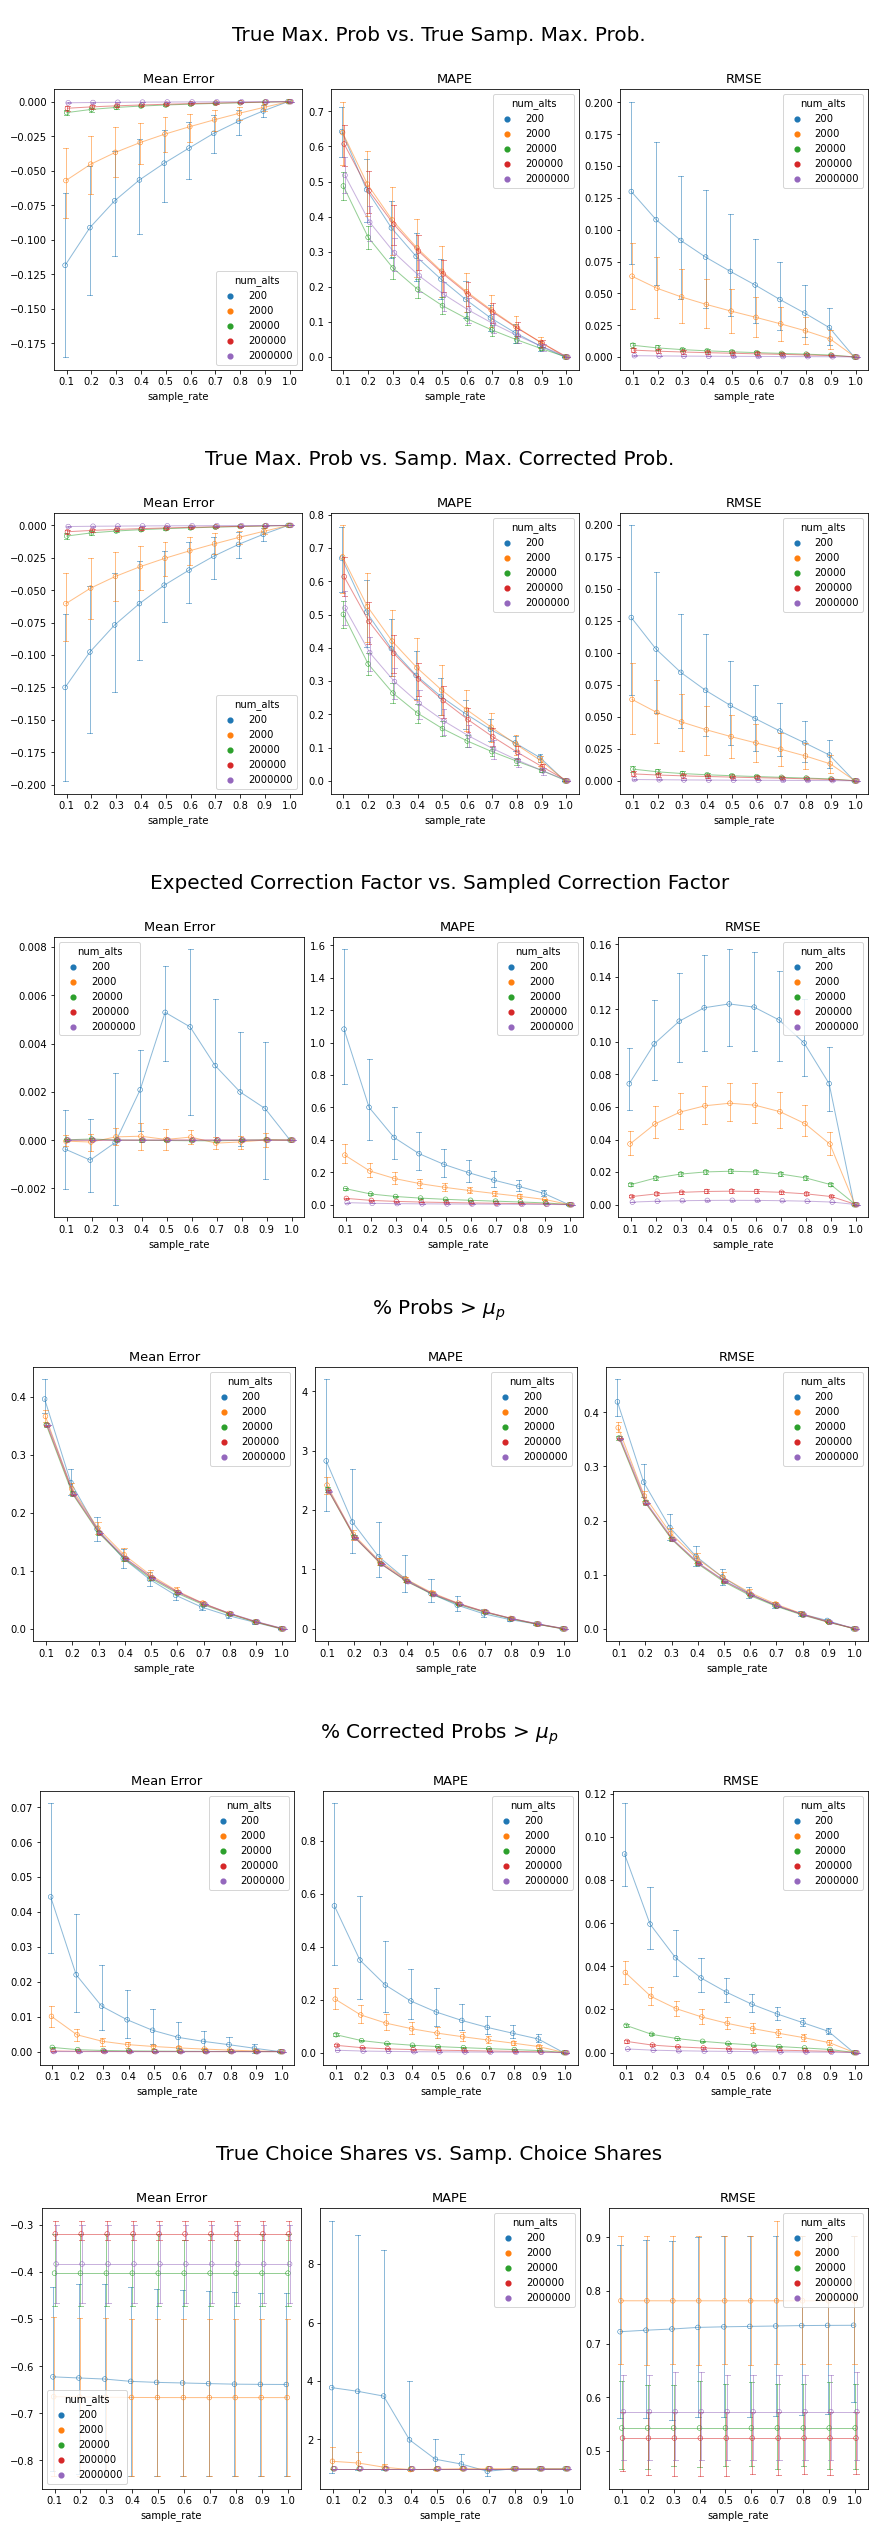

In [49]:
fig, axarr = plt.subplots(6, 1, figsize=(12, 35), sharex=True, constrained_layout=True)
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.)
fig.suptitle(' ')

# clear subplots
for ax in axarr:
    ax.remove()

# add subfigure per subplot
gridspec = axarr[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for row, subfig in enumerate(subfigs):
    
    subfig.suptitle(metric_labels[row] + '\n', fontsize=20)
    
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3, sharex=True)
    
    for col, ax in enumerate(axs):
        g = sns.pointplot(
            data=metrics_df,
            x='sample_rate', y=metric_cols[row * num_err_types + col],
            hue='num_alts', dodge=True, scale=0.7, ax=ax, capsize=.2)
        
        plt.setp(g.collections, alpha=1, facecolor='none', lw=.5)  # for the markers
        plt.setp(g.lines, alpha=.5, lw=1)                          # for the lines

        ax.set_title(error_type_labels[col], fontsize=13)

        ax.set_ylabel("")

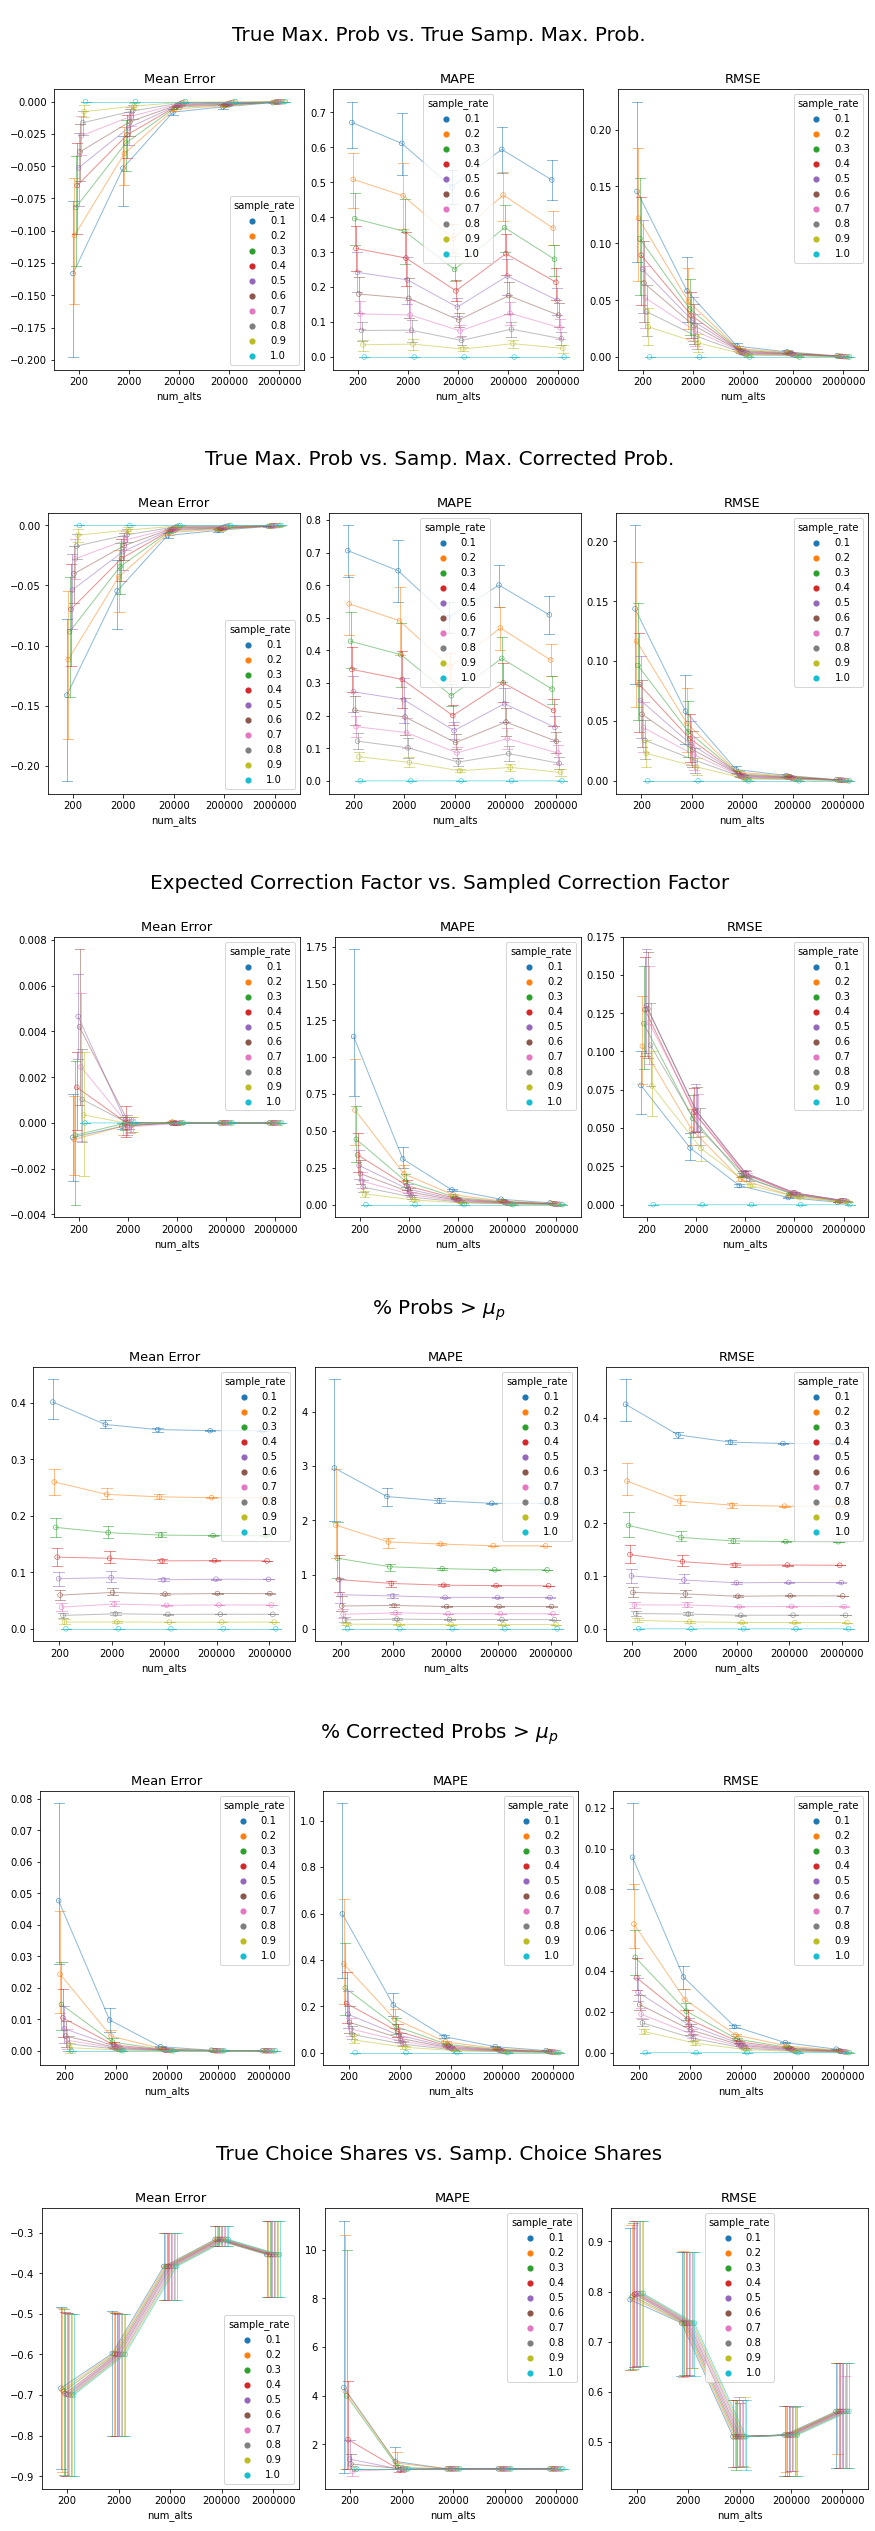

In [39]:
fig, axarr = plt.subplots(6, 1, figsize=(12, 35), sharex=True, constrained_layout=True)
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.)
fig.suptitle(' ')

# clear subplots
for ax in axarr:
    ax.remove()

# add subfigure per subplot
gridspec = axarr[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for row, subfig in enumerate(subfigs):
    
    subfig.suptitle(metric_labels[row] + '\n', fontsize=20)
    
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3, sharex=True)
    
    for col, ax in enumerate(axs):
        g = sns.pointplot(
            data=metrics_df, x='num_alts', y=metric_cols[row * num_err_types + col],
            hue='sample_rate', ax=ax, scale=0.7, dodge=True, capsize=.2)
        
        plt.setp(g.collections, alpha=1, facecolor='none', lw=.5)  # for the markers
        plt.setp(g.lines, alpha=.5, lw=1)                          # for the lines

        ax.set_title(error_type_labels[col], fontsize=13)

        ax.set_ylabel("")

# Same but Normalized

In [40]:
max_metrics = np.abs(metrics_df).groupby(['run_id', 'num_alts', 'num_choosers']).max()
max_metrics_df = max_metrics.reindex(metrics_df.set_index(['run_id','num_alts','num_choosers']).index).reset_index()

for col in metric_cols:
    normed_metrics_df[col] = normed_metrics_df[col] / max_metrics_df[col]

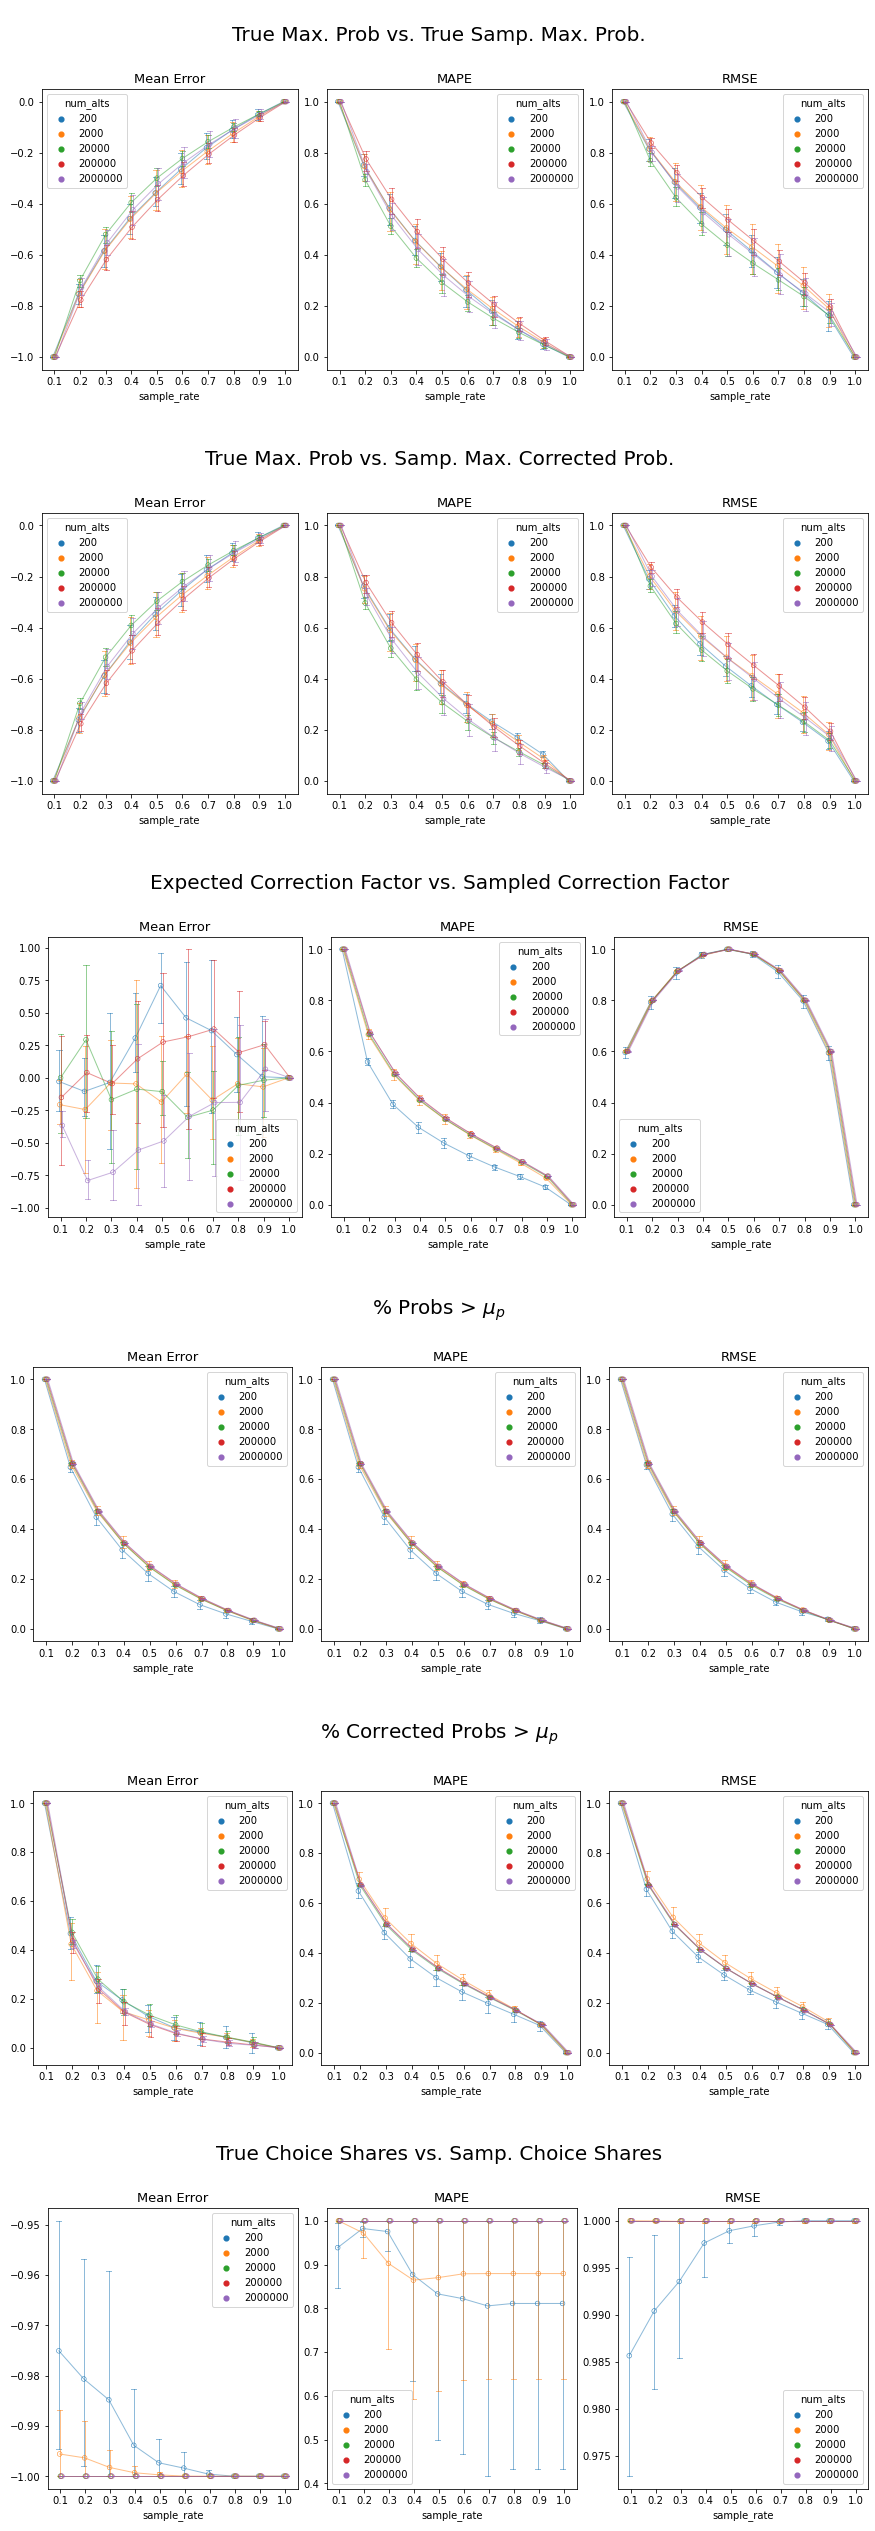

In [41]:
fig, axarr = plt.subplots(6, 1, figsize=(12, 35), sharex=True, constrained_layout=True)
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.)
fig.suptitle(' ')

# clear subplots
for ax in axarr:
    ax.remove()

# add subfigure per subplot
gridspec = axarr[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for row, subfig in enumerate(subfigs):
    
    subfig.suptitle(metric_labels[row] + '\n', fontsize=20)
    
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3, sharex=True)
    
    for col, ax in enumerate(axs):
        g = sns.pointplot(
            data=normed_metrics_df,
            x='sample_rate', y=metric_cols[row * num_err_types + col],
            hue='num_alts', linestyle='num_alts', dodge=True, scale=0.7, ax=ax, capsize=.2)
        
        plt.setp(g.collections, alpha=1, facecolor='none', lw=.5)  # for the markers
        plt.setp(g.lines, alpha=.5, lw=1)                          # for the lines

        ax.set_title(error_type_labels[col], fontsize=13)

        ax.set_ylabel("")

# Chooser-level data

In [42]:
metric_to_col = {
        'num_alts': 0, 'sample_rate': 1,
        'true_choice': 2, 'samp_choice': 3,
        'tmsm_err': 4, 'tmsm_pct_err': 5, 'tmsm_sq_err': 6,
        'tmsmc_err': 7, 'tmsmc_pct_err': 8, 'tmsmc_sq_err': 9,
        'cf_err': 10, 'cf_pct_err': 11, 'cf_sq_err': 12,
        'ppgm_err': 13, 'ppgm_pct_err': 14, 'ppgm_sq_err': 15,
        'pcpgm_err': 16, 'pcpgm_pct_err': 17, 'pcpgm_sq_err': 18}

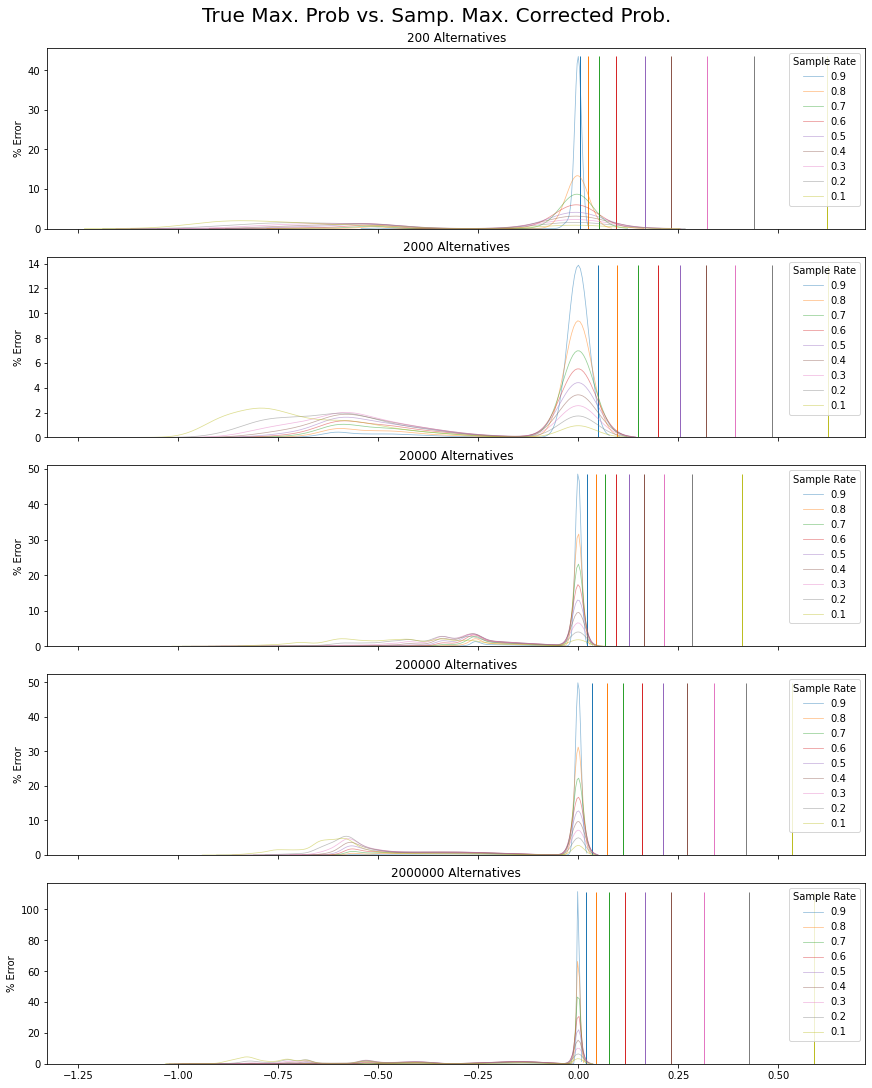

In [44]:
fig, axarr = plt.subplots(5, 1, figsize=(12,15), sharex=True, constrained_layout=True)
fig.suptitle(metric_labels[0], fontsize=20)
for row, num_alts in enumerate([200, 2000, 20000, 200000, 2000000]):
    fname = '../data/chooser_err_metrics_{0}_alts.npy'.format(num_alts)
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            iter_metrics = np.load(f)
            for i in range(10)[::-1]:
                if i == 9:
                    continue
                metrics = iter_metrics[:, i, :]
                metrics = metrics.reshape((int(num_alts * 750/200), 19))
                metric = metrics[:, metric_to_col['tmsm_pct_err']]
                sns.kdeplot(metric, label=np.round((i + 1) * .1, 1), ax=axarr[row], alpha=0.5, lw=0.75)
                color = axarr[row].lines[-1].get_color()
                max_val = axarr[row].lines[0].get_ydata().max()
                axarr[row].vlines(np.mean(np.abs(metric)), 0, max_val, lw=1, edgecolor=color, alpha=1)
                axarr[row].legend(title='Sample Rate')
                axarr[row].set_title("{0} Alternatives".format(num_alts))
                axarr[row].set_ylabel("% Error")
        

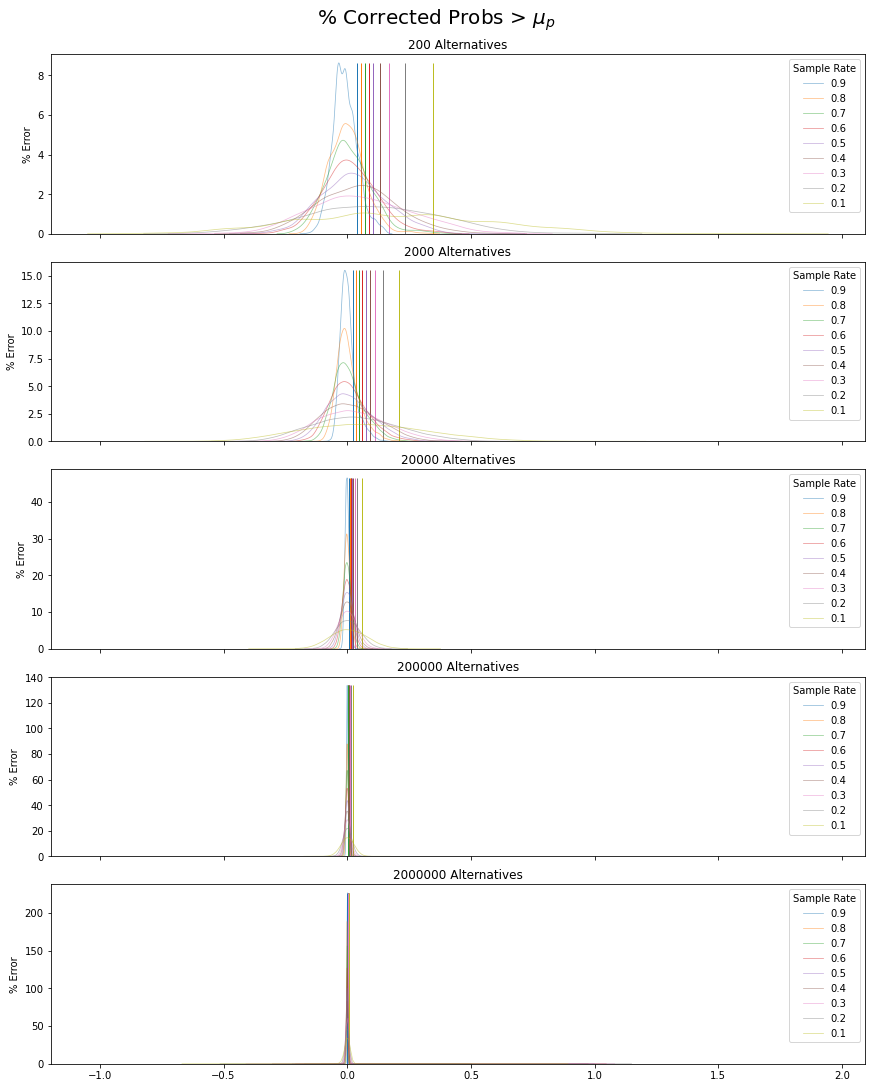

In [45]:
fig, axarr = plt.subplots(5, 1, figsize=(12,15), sharex=True, constrained_layout=True)
fig.suptitle(metric_labels[4], fontsize=20)
for row, num_alts in enumerate([200, 2000, 20000, 200000, 2000000]):
    fname = '../data/chooser_err_metrics_{0}_alts.npy'.format(num_alts)
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            iter_metrics = np.load(f)
            for i in range(10)[::-1]:
                if i == 9:
                    continue
                metrics = iter_metrics[:, i, :]
                metrics = metrics.reshape((int(num_alts * 750/200), 19))
                metric = metrics[:, metric_to_col['pcpgm_pct_err']]
                sns.kdeplot(metric, label=np.round((i + 1) * .1, 1), ax=axarr[row], alpha=0.5, lw=0.75)
                color = axarr[row].lines[-1].get_color()
                max_val = axarr[row].lines[0].get_ydata().max()
                axarr[row].vlines(np.mean(np.abs(metric)), 0, max_val, lw=1, edgecolor=color, alpha=1)
                axarr[row].legend(title='Sample Rate')
                axarr[row].set_title("{0} Alternatives".format(num_alts))
                axarr[row].set_ylabel("% Error")
        